In [67]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

In [2]:
# 시각화 한글폰트 설정 (아래 코드를 실행하세요)

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [3]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv', index_col=0)
train_y = pd.read_csv('train_y.csv', index_col=0)
test_x = pd.read_csv('test_x.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)

In [4]:
train_x.head(2)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),...,이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),PM10_lag1
time,,,,,,,,,,,,,,,,,,,,,
2021-01-02 01:00:00,0.003,0.4,0.031,0.010,25.0,9.0,-4.1,0.0,2.3,39,...,-16.0,1015.1,0.0,0.010000,0.0,0.0,0,14.605263,2000,25.0
2021-01-02 02:00:00,0.003,0.4,0.017,0.022,29.0,12.0,-5.0,0.0,2.7,42,...,-15.9,1015.5,0.0,0.008571,0.0,0.0,0,14.473684,2000,27.0


---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [5]:
# LinearRegression 코드를 작성하세요.


model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [6]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(test_x)

In [47]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
LR_mse = mse(test_y, y_pred_LR)
LR_r2 = r2_score(test_y, y_pred_LR)

result = {}

result['Linear Regression'] = [LR_mse, LR_r2]
print("LR mse :", LR_mse)
print("LR r2 :", LR_r2)

LR mse : 37.121263018722225
LR r2 : 0.9333233993839007


In [8]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model, 'LR_model.pkl')

['LR_model.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [106]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = RFR(random_state=1)

model.fit(train_x, train_y)

C:\Users\User\AppData\Local\Temp\ipykernel_5704\1851176354.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


RandomForestRegressor(random_state=1)

In [107]:
# Test 데이터로 성능을 평가해보세요.
y_pred_RFR = model.predict(test_x)

RFR_mse = mse(test_y, y_pred_RFR)
RFR_r2 = r2_score(test_y, y_pred_RFR)

result['Random Forest'] = [RFR_mse, RFR_r2]
print(f"RFR mse : {RFR_mse:0.5f}")
print(f"RFR r2 : {RFR_r2:0.5f}")

RFR mse : 38.37721
RFR r2 : 0.93107


In [11]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, 'RFR_model.pkl')

['RFR_model.pkl']

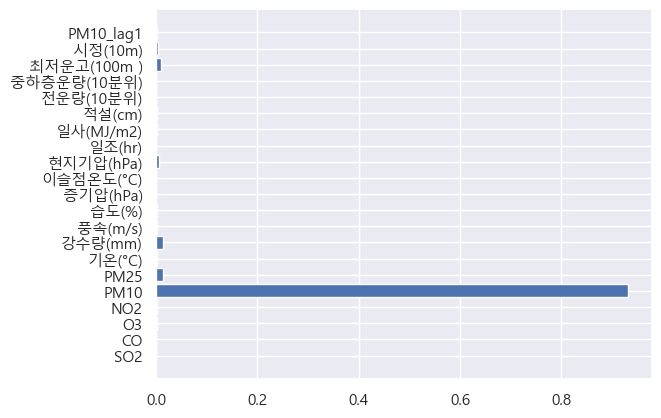

In [12]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

plt.barh(list(train_x), model.feature_importances_)
plt.show()

In [13]:
# (선택) 확인할 수 있는 인사이트
# 1. 한시간 전 미세먼지 농도가 대부분을 차지 한다.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [108]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = GBR(random_state=1)
model.fit(train_x, train_y)

c:\Users\User\anaconda3\envs\aivle\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=1)

In [109]:
# Test 데이터로 성능을 평가해보세요.
y_pred_GBR = model.predict(test_x)

GBR_mse = mse(test_y, y_pred_GBR)
GBR_r2 = r2_score(test_y, y_pred_GBR)

result['Gradient Boosting Regression'] = [GBR_mse, GBR_r2]
print(f"GBR mse : {GBR_mse:0.5f}")
print(f"GBR r2 : {GBR_r2:0.5f}")

GBR mse : 36.81999
GBR r2 : 0.93386


In [16]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, 'GBR_model.pkl')

['GBR_model.pkl']

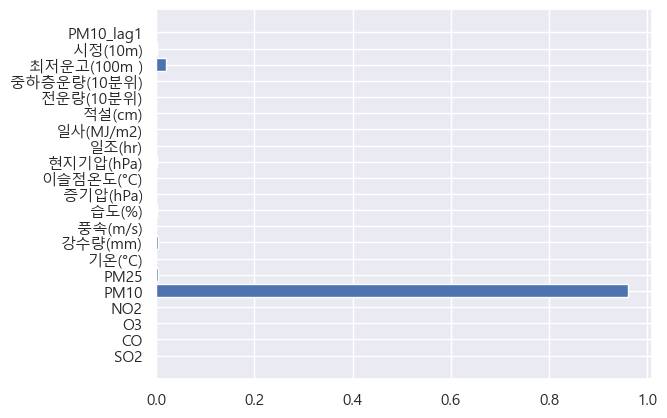

In [17]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인


plt.barh(list(train_x), model.feature_importances_)
plt.show()

In [18]:
# 확인할 수 있는 인사이트
# 1. 마찬가지로 한 시간 전 미세먼지로 대부분 판단
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from lightgbm import LGBMRegressor

In [110]:
model = LGBMRegressor()
model.fit(train_x, train_y)

LGBMRegressor()

In [111]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LGBM = model.predict(test_x)

LGBM_mse = mse(test_y, y_pred_LGBM)
LGBM_r2 = r2_score(test_y, y_pred_LGBM)

result['LightGBM'] = [LGBM_mse, LGBM_r2]
print(f"LGBM mse : {LGBM_mse:0.5f}")
print(f"LGBM r2 : {LGBM_r2:0.5f}")

LGBM mse : 39.73740
LGBM r2 : 0.92862


In [26]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, 'LGBM_model.pkl')

['LGBM_model.pkl']

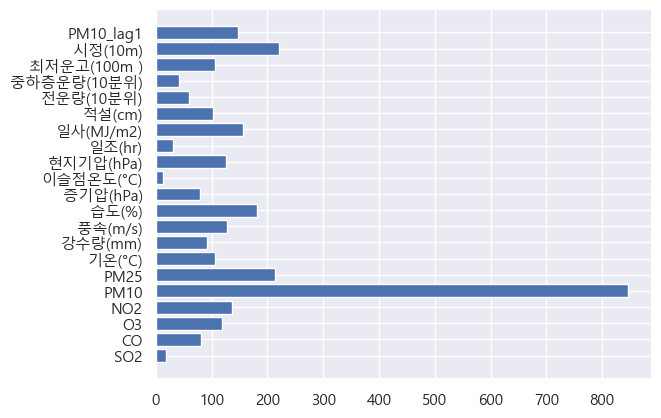

In [27]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

plt.barh(list(train_x), model.feature_importances_)
plt.show()

In [ ]:
# 확인할 수 있는 인사이트
# 1. 마찬가지로 한시간 전 미세먼지 농도가 상당히 높은 비율 차지
# 2.
# 3.

In [66]:
# 모델별 성능 비교
for name, item in result.items():
    print(f"{name:30} : mse({item[0]:0.5f}), r2({item[1]:0.5f})")

Linear Regression              : mse(37.12126), r2(0.93332)
Random Forest                  : mse(39.73740), r2(0.92862)
Gradient Boosting Regression   : mse(39.73740), r2(0.92862)
LightGBM                       : mse(39.73740), r2(0.92862)


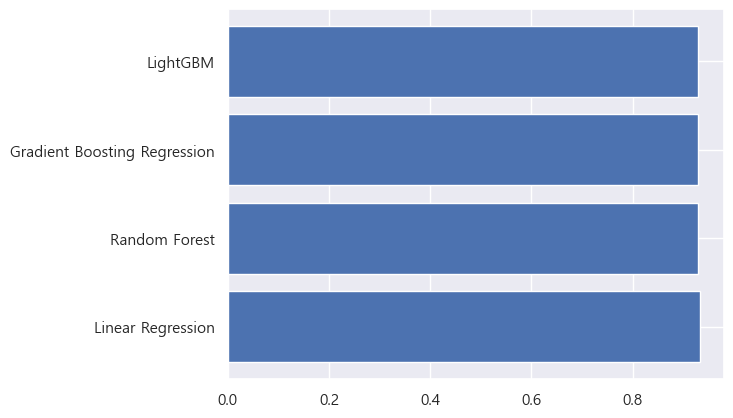

In [62]:
# 모델별 성능 비교
plt.barh(list(result.keys()), np.array(list(result.values()))[:, 1])
plt.show()

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [70]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model_RFR = RFR(random_state=1)
param = {
    'max_depth' : range(1, 5)
}

model = GridSearchCV(
    model_RFR,
    param,
    cv=5
)

In [75]:
model.fit(train_x, train_y['PM10_1'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 5)})

In [77]:
model.best_params_, model.best_score_

({'max_depth': 4}, 0.7898374548246715)

In [78]:
model_RFR = RFR(random_state=1)
param = {
    'max_depth' : range(4, 8)
}

model = GridSearchCV(
    model_RFR,
    param,
    cv=5
)

model.fit(train_x, train_y['PM10_1'])

model.best_params_, model.best_score_

({'max_depth': 6}, 0.8363362957139676)

In [79]:
model_RFR = RFR(max_depth=6, random_state=1)
param = {
    'min_samples_leaf' : range(1, 5),
    'min_samples_split' : range(2, 10, 2)
}

model = GridSearchCV(
    model_RFR,
    param,
    cv=5
)

model.fit(train_x, train_y['PM10_1'])

model.best_params_, model.best_score_

({'min_samples_leaf': 1, 'min_samples_split': 2}, 0.8363362957139676)

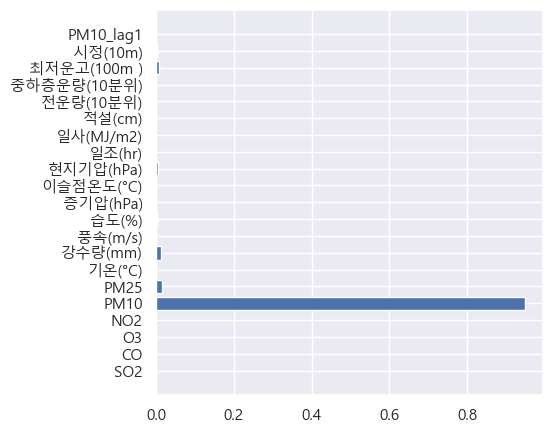

In [81]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(train_x), width=model.best_estimator_.feature_importances_)
plt.show()

In [85]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [86]:
model.coef_

array([[-1.16608909e+02,  3.09267801e+00,  2.43764007e+01,
         3.66711678e+01,  9.87919055e-01, -2.23823861e-02,
         6.45997414e-01, -7.45966888e-02, -6.42142467e-03,
         1.91579896e-01, -4.32881687e-02, -7.03483245e-01,
        -4.69958141e-02, -6.42894194e-01,  5.21798094e-01,
         2.29667755e-01, -7.77435922e-02,  6.42279124e-02,
        -3.50918053e-03,  8.23301794e-04, -2.02526854e-02]])

In [87]:
model.feature_names_in_

array(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', 'PM10_lag1'], dtype=object)

In [89]:
coefs = pd.DataFrame(model.coef_, columns=model.feature_names_in_)
coefs

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),...,이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),PM10_lag1
0,-116.608909,3.092678,24.376401,36.671168,0.987919,-0.022382,0.645997,-0.074597,-0.006421,0.19158,...,-0.703483,-0.046996,-0.642894,0.521798,0.229668,-0.077744,0.064228,-0.003509,0.000823,-0.020253


<Axes: >

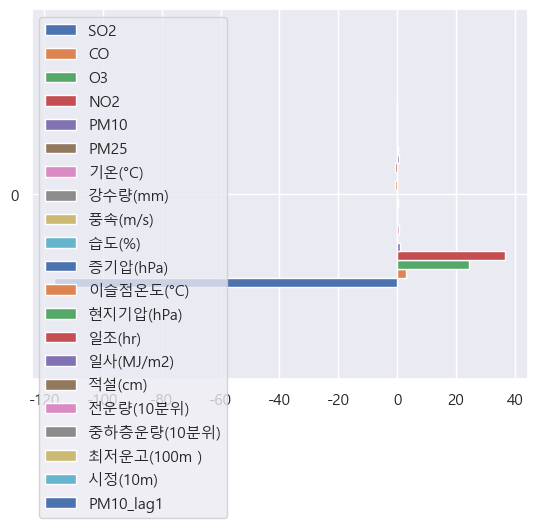

In [92]:
coefs.plot(kind='barh')

In [112]:
model = Ridge()
model.fit(train_x, train_y)

Ridge()

In [113]:
y_pred_Ridge = model.predict(test_x)

Ridge_mse = mse(test_y, y_pred_Ridge)
Ridge_r2 = r2_score(test_y, y_pred_Ridge)

result['Ridge'] = [Ridge_mse, Ridge_r2]
print(f"Ridge mse : {Ridge_mse:0.5f}")
print(f"Ridge r2 : {Ridge_r2:0.5f}")

Ridge mse : 37.19948
Ridge r2 : 0.93318


<Axes: >

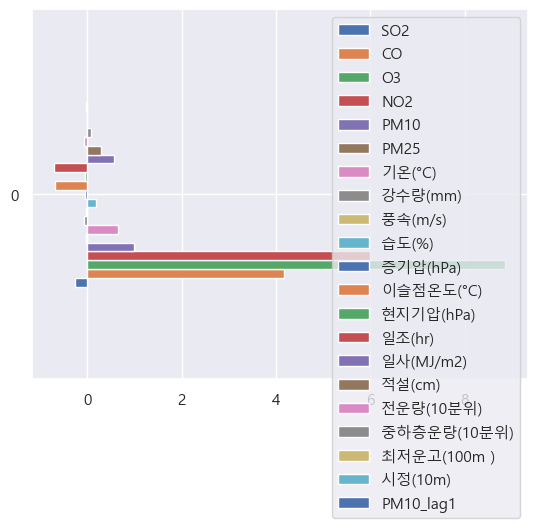

In [114]:
coefs = pd.DataFrame(model.coef_, columns=model.feature_names_in_)
coefs.plot(kind='barh')

<Axes: >

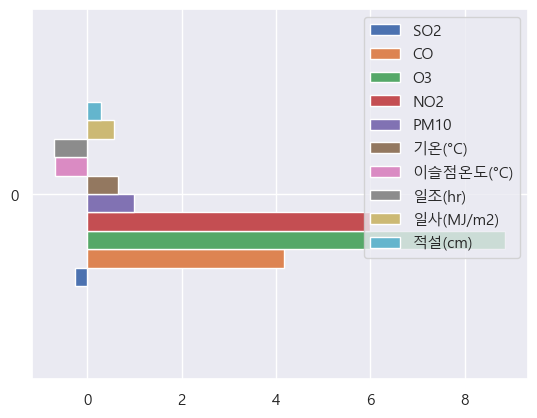

In [137]:
cols = np.array(list(coefs))[np.array(list(abs(coefs.loc[0, :]) > 0.2))]
coefs.loc[:, cols].plot(kind='barh')

---

In [99]:
temp_train_x = train_x.drop(['PM10', 'PM25'], axis=1)
temp_test_x = test_x.drop(['PM10', 'PM25'], axis=1)

In [138]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = RFR(random_state=1)

model.fit(temp_train_x, train_y)

C:\Users\User\AppData\Local\Temp\ipykernel_5704\1034188266.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(temp_train_x, train_y)


RandomForestRegressor(random_state=1)

In [139]:
# Test 데이터로 성능을 평가해보세요.
y_pred_RFR = model.predict(temp_test_x)

RFR_mse = mse(test_y, y_pred_RFR)
RFR_r2 = r2_score(test_y, y_pred_RFR)

result['Random Forest'] = [RFR_mse, RFR_r2]
print(f"RFR mse :{RFR_mse:0.5f}")
print(f"RFR r2 :{RFR_r2:0.5f}")

RFR mse :237.21676
RFR r2 :0.57392


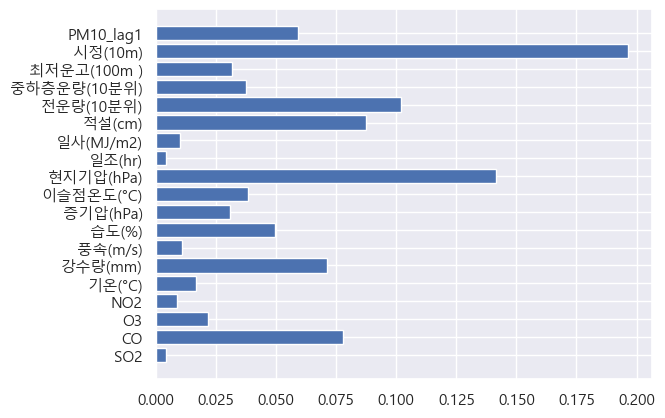

In [140]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

plt.barh(list(temp_train_x), model.feature_importances_)
plt.show()

In [141]:
model = Ridge()
model.fit(temp_train_x, train_y)

Ridge()

<Axes: >

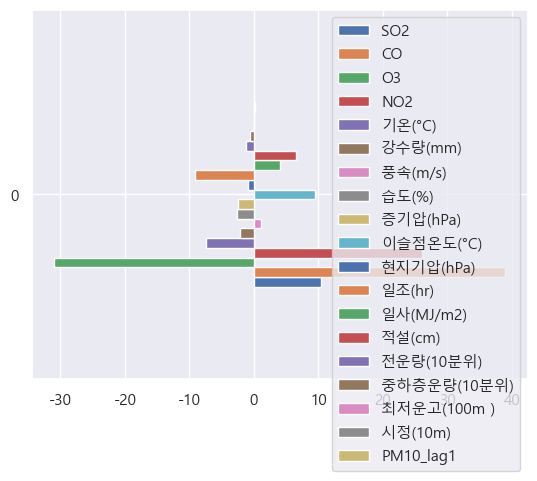

In [142]:
coefs = pd.DataFrame(model.coef_, columns=model.feature_names_in_)
coefs.plot(kind='barh')